# 1. Package and Data Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
df = pd.read_csv('./examples/example_wp_peyton_manning.csv')

In [3]:
df.head()

,ds,y
0,2007-12-10,14629
1,2007-12-11,5012
2,2007-12-12,3582
3,2007-12-13,3205
4,2007-12-14,2680


In [4]:
df['y'] = np.log(df['y'])

# 2. Seasonality

In [7]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [8]:
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/sailyourlife/anaconda3/envs/nextopt/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [9]:
future = m.make_future_dataframe(periods=365)

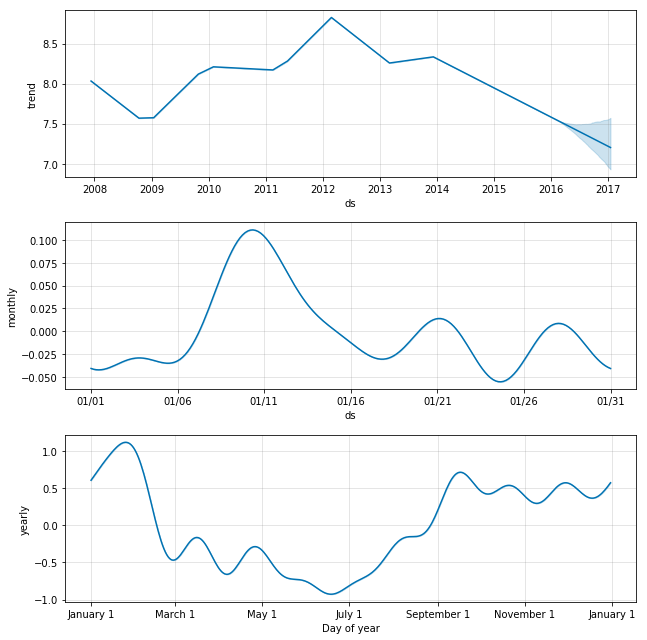

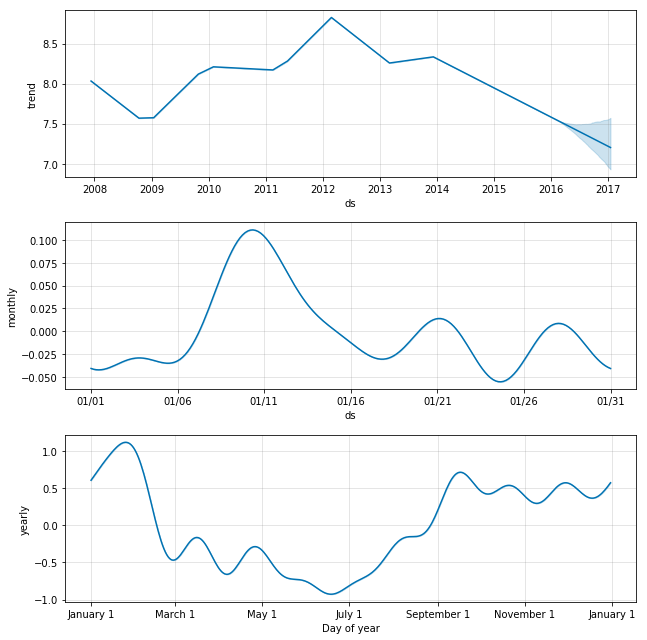

In [10]:
forecast = m.predict(future)
m.plot_components(forecast)

# 3. Holiday

In [22]:
playoffs = pd.DataFrame({
    'holiday': 'playoff',
    'ds': pd.to_datetime([
        '2008-01-13', '2009-01-03', '2010-01-16',
        '2010-01-24', '2010-02-07', '2011-01-18',
        '2013-01-12', '2014-01-12', '2014-01-19',
        '2014-02-02', '2015-01-11', '2016-01-17',
        '2016-01-24', '2016-02-07']),
    'lower_window': -90,
    'upper_window': 90,
})

superbowls = pd.DataFrame({
    'holiday': 'superbowl',
    'ds': pd.to_datetime(['2010-02-07','2014-02-02','2016-02-07']),
    'lower_window': 0,
    'upper_window': 0,
})

holidays = pd.concat([playoffs, superbowls])

In [23]:
m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/sailyourlife/anaconda3/envs/nextopt/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [24]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
    ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
3003,2016-04-28,0.173492,0.0
3004,2016-04-29,0.047500,0.0
3005,2016-04-30,0.031831,0.0
3006,2016-05-01,-0.043556,0.0
3007,2016-05-02,-0.064244,0.0
3008,2016-05-03,0.005607,0.0
3009,2016-05-04,0.048737,0.0
3010,2016-05-05,0.102542,0.0
3011,2016-05-06,0.163898,0.0
3012,2016-05-07,0.078140,0.0


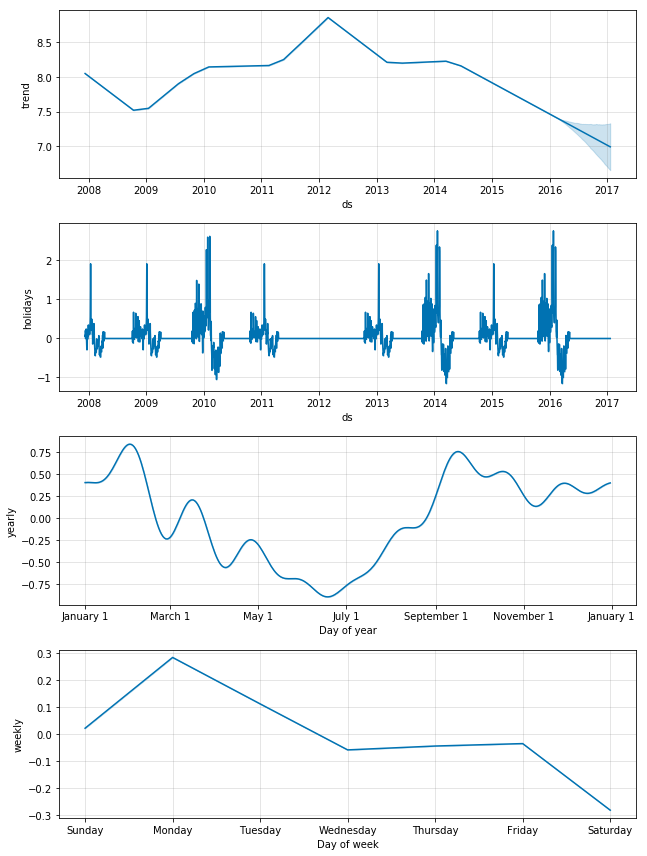

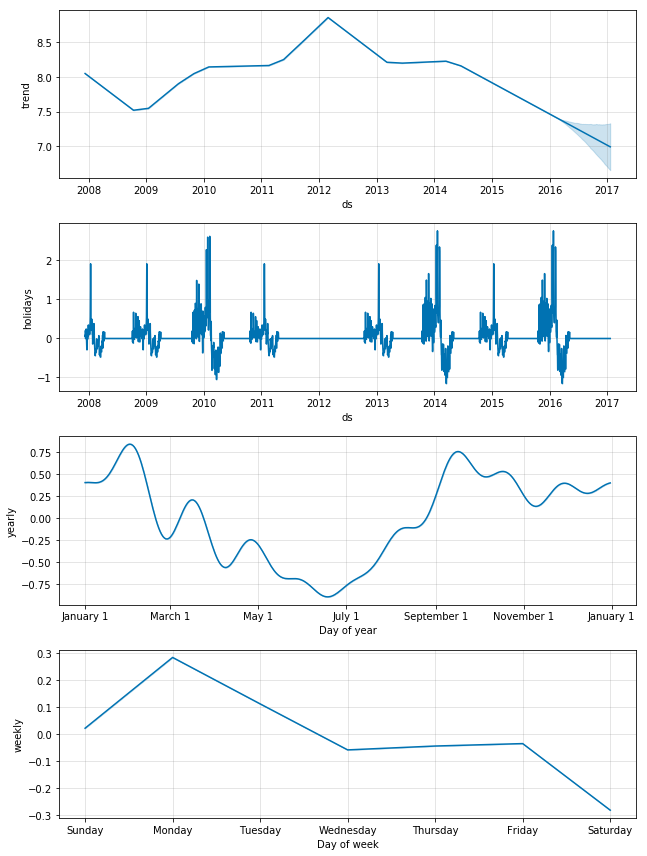

In [25]:
m.plot_components(forecast)

# 4. Adjusting Prior Scale

In [41]:
m = Prophet(holidays=holidays, holidays_prior_scale=0.05).fit(df)
forecast = m.predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
    ['ds', 'playoff', 'superbowl']][-10:]

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/sailyourlife/anaconda/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,playoff,superbowl
2190,2014-02-02,1.090894,1.050923
2191,2014-02-03,1.626437,1.138944
2532,2015-01-11,1.090894,0.000000
2533,2015-01-12,1.626437,0.000000
2901,2016-01-17,1.090894,0.000000
2902,2016-01-18,1.626437,0.000000
2908,2016-01-24,1.090894,0.000000
2909,2016-01-25,1.626437,0.000000
2922,2016-02-07,1.090894,1.050923
2923,2016-02-08,1.626437,1.138944


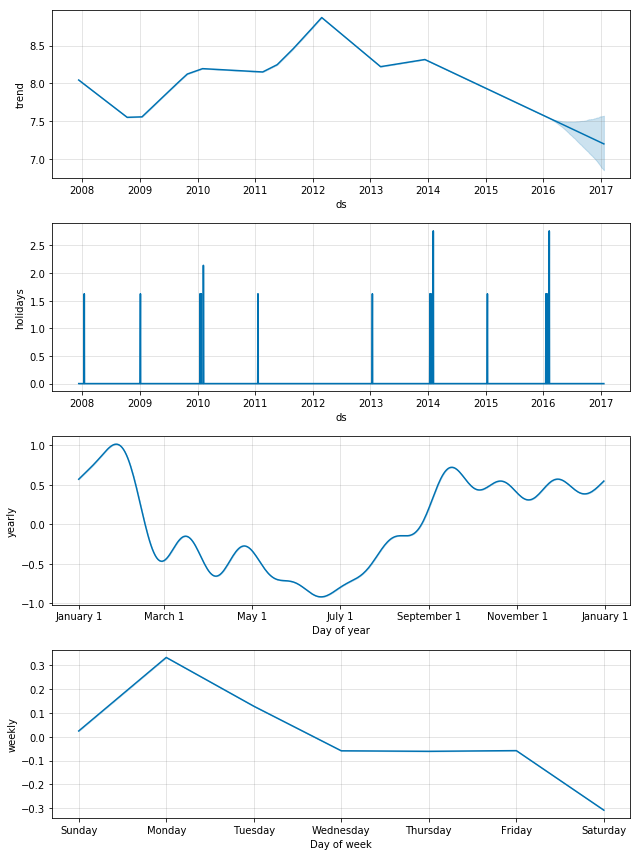

In [42]:
m.plot_components(forecast)

# 5. Add Regressor

In [43]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)


In [44]:
df

,ds,y,nfl_sunday
0,2007-12-10,9.590761,0
1,2007-12-11,8.519590,0
2,2007-12-12,8.183677,0
3,2007-12-13,8.072467,0
4,2007-12-14,7.893572,0
5,2007-12-15,7.783641,0
6,2007-12-16,8.414052,1
7,2007-12-17,8.829226,0
8,2007-12-18,8.382518,0
9,2007-12-19,8.069655,0


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/sailyourlife/anaconda/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


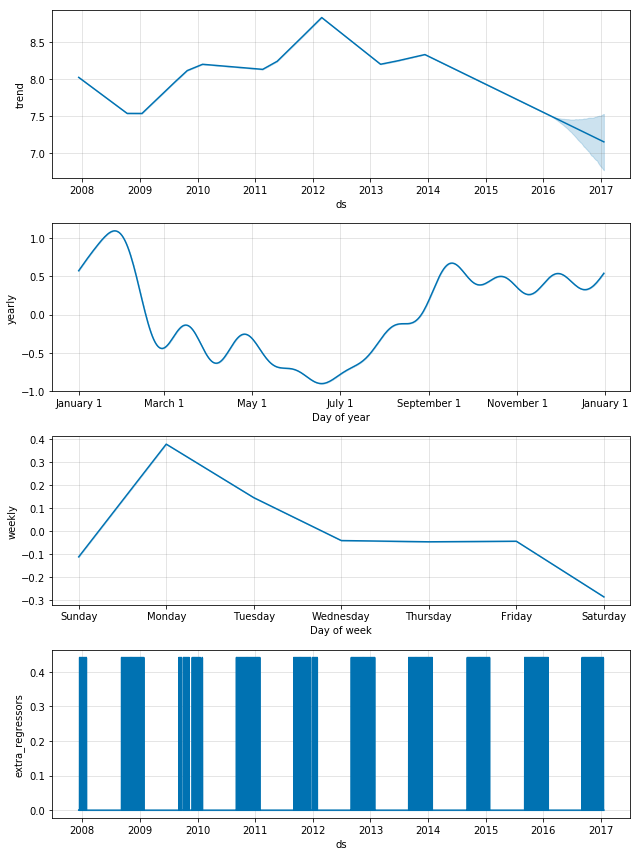

In [46]:
m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)

future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = m.predict(future)
m.plot_components(forecast)